# unit 3 / lesson 1 / project 3 
## KNN classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## nearest neighbor

In [8]:
music = pd.DataFrame()

# Some data to play with.
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]


music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration', 'bpm']]
y = music.jazz
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
from sklearn import metrics

In [11]:
y_predict = neighbors.predict(X)

In [12]:
print(metrics.accuracy_score(y, y_predict))

1.0


The score is perfectly accurate when we test the same data we trained on

## K-fold cross-validation
We can use k-fold cross-validation to get the average accuracy when we train and test on k different folds

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
print(scores)

[0.75       0.75       0.66666667 0.66666667 0.66666667 0.66666667
 1.         0.33333333 0.5        1.        ]


In [15]:
scores.mean()

0.7

After using k-fold cross-validation to perform 10 different train/test splitson the data, the average accuracy of all 10 is 0.7

This is not a particularly well trained model. 

## Finding the optimal k-number of neighbors
Foreach of gthe 10 different train/tests splits, we are going to different values of k-nearest neighbors to look at

For each value of k, we will keep track of the average score across the 10 train/test splits

This will tell us which value for k-nearest neighbors is consistantly the most accurate

In [33]:
import math

In [41]:
cv_value = 10
range_max = math.floor(len(music)-(len(music)/cv_value))

In [46]:
k_range = range(1, range_max)
k_scores = []
for k in k_range:
    neighbors = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neighbors, X, y, cv=cv_value, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'cross-validated accuracy')

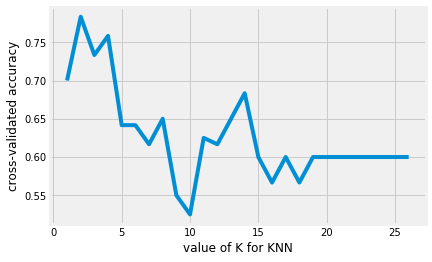

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("cross-validated accuracy")

On average, when k-nearnest neighbors is 2, we get the best results during cross-validation

## Feature Selection
Keeping the number of nearest neighbors at 2, check to see what features are increasing or decreasing the accuracy of the model

In [78]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = music[['loudness', 'duration', 'bpm']]
y = music.jazz
neighbors.fit(X,Y)

scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
with_bpm_score = scores.mean()
with_bpm_score

0.7833333333333333

In [77]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = music[['loudness', 'duration']]
y = music.jazz
neighbors.fit(X,Y)

scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
wo_bpm_score = scores.mean()
wo_bpm_score

0.55

In [79]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = music[['loudness', 'bpm']]
y = music.jazz
neighbors.fit(X,Y)

scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
wo_duration_score = scores.mean()
wo_duration_score

0.9333333333333332

In [80]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = music[['duration', 'bpm']]
y = music.jazz
neighbors.fit(X,Y)

scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
wo_loudness_score = scores.mean()
wo_loudness_score

0.725

In [81]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = music[['bpm']]
y = music.jazz
neighbors.fit(X,Y)

scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
bpm_score = scores.mean()
bpm_score

0.775

In [82]:
neighbors = KNeighborsClassifier(n_neighbors=2)
X = music[['loudness']]
y = music.jazz
neighbors.fit(X,Y)

scores = cross_val_score(neighbors, X, y, cv=10, scoring='accuracy')
loudness_score = scores.mean()
loudness_score

0.9666666666666666

Text(0, 0.5, 'cross-validated accuracy')

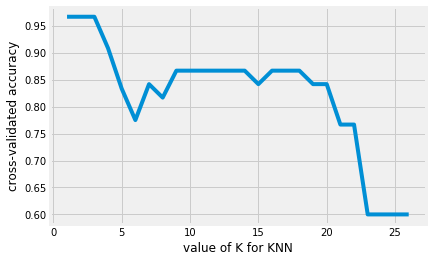

In [83]:
X = music[['loudness']]
y = music.jazz

cv_value = 10
range_max = math.floor(len(music)-(len(music)/cv_value))

k_range = range(1, range_max)
k_scores = []
for k in k_range:
    neighbors = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neighbors, X, y, cv=cv_value, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("cross-validated accuracy")

The best results come when only loudness is used to predict weather a song is Jazz or Rock 

Using loudness as the only feature of the model, 2 is still the best number of nearest neighbors to check against.